In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

path = "C:\\Users\\Nathan\\Desktop\\Guttenberg Gait Database\\"

# GRF Left 
Grfleft = pd.read_csv(os.path.join(path,'GRF_F_V_PRO_left.csv'))
#Velocity
Velocity = pd.read_csv(os.path.join(path,'GRF_walking_speed.csv'))
#Metadata
Metadata = pd.read_csv(os.path.join(path,'GRF_metadata.csv'))

# Enlever les variables inutiles de Metada
Metadata = Metadata[Metadata.columns[Metadata.isna().sum()/Metadata.shape[0] <0.3]] #enlève les colonnes avec + de 30% de NaN
Metadata = Metadata.loc[: , [len(Metadata[col].value_counts())>=2 for col in Metadata.columns]] #enlève les colonnes qui ne varient pas
Metadata = Metadata.drop(["SESSION_DATE","READMISSION","BODY_WEIGHT","DATASET_ID", "SUBJECT_ID"], axis = "columns") #enlève les colonnes inutiles ou redondante 

# Création du dataframe pour le machine learning
df = Velocity.merge(Metadata, on ="SESSION_ID") # add WALKING_SPEED AGE HEIGHT BODY_MASS en associant en fonction de SESSION_ID
df = df.drop(["DATASET_ID", "SESSION_ID", "TRIAL_ID", "SUBJECT_ID" ], axis = "columns") #enlève les colonnes inutiles

# Creation de la target
Grfleft = Grfleft.drop(["DATASET_ID", "SESSION_ID"], axis = "columns") #enlève les colonnes inutiles
# Grfleft["grf"] = [np.asarray(Grfleft.iloc[index, 1:]) for index in range(0,Grfleft.shape[0])] # Préparation de la variable target
Grfleft["grf"] = Grfleft.drop(["SUBJECT_ID", "TRIAL_ID"], axis=1).max(axis=1) # Préparation de la variable target
Grfleft = Grfleft[['grf']]

# Ajout de la target au dataframe
df = df.merge(Grfleft, on=df.index).drop(["key_0"], axis = "columns")
df = df.dropna(subset=["WALKING_SPEED"], axis= 'index') # je ne veux pas de NaN sur la vitesse

Exploratory data analysis 

<AxesSubplot:>

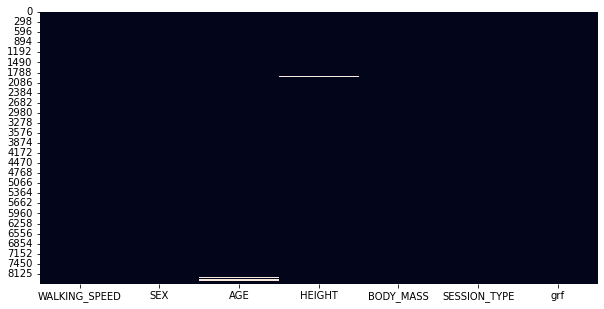

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False)

c:\Users\Nathan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Nathan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Nathan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

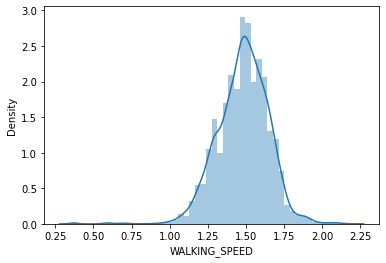

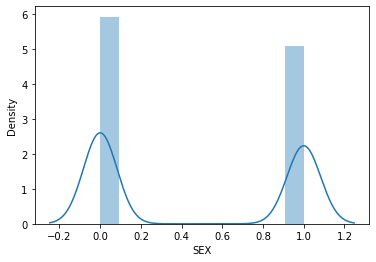

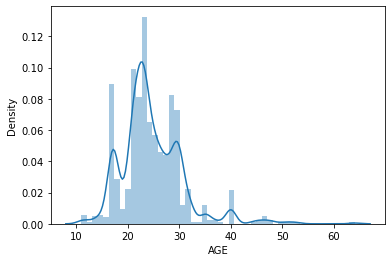

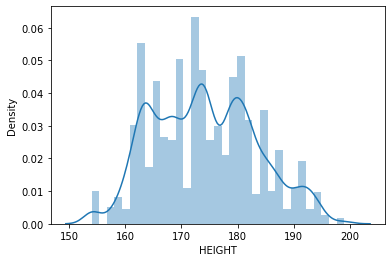

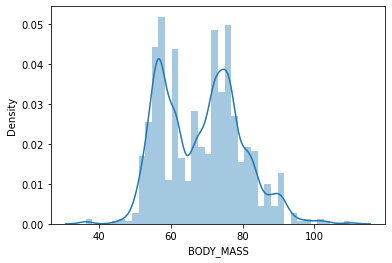

In [11]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

c:\Users\Nathan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Nathan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


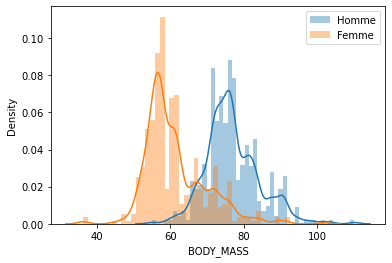

In [28]:
plt.figure()
sns.distplot(df["BODY_MASS"][df["SEX"] == 1.0], label= "Homme")
sns.distplot(df["BODY_MASS"][df["SEX"] == 0.0], label= "Femme")
plt.legend()

c:\Users\Nathan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Nathan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


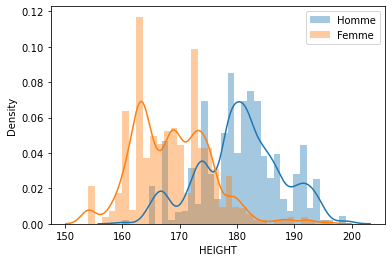

In [39]:
plt.figure()
sns.distplot(df["HEIGHT"][df["SEX"] == 1.0], label= "Homme")
sns.distplot(df["HEIGHT"][df["SEX"] == 0.0], label= "Femme")
plt.legend()

c:\Users\Nathan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Nathan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


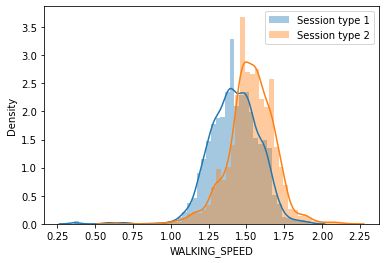

In [67]:
plt.figure()
sns.distplot(df["WALKING_SPEED"][df["SESSION_TYPE"] == 1], label= "Session type 1")
sns.distplot(df["WALKING_SPEED"][df["SESSION_TYPE"] == 2], label= "Session type 2")
plt.legend()

<Figure size 1080x720 with 0 Axes>

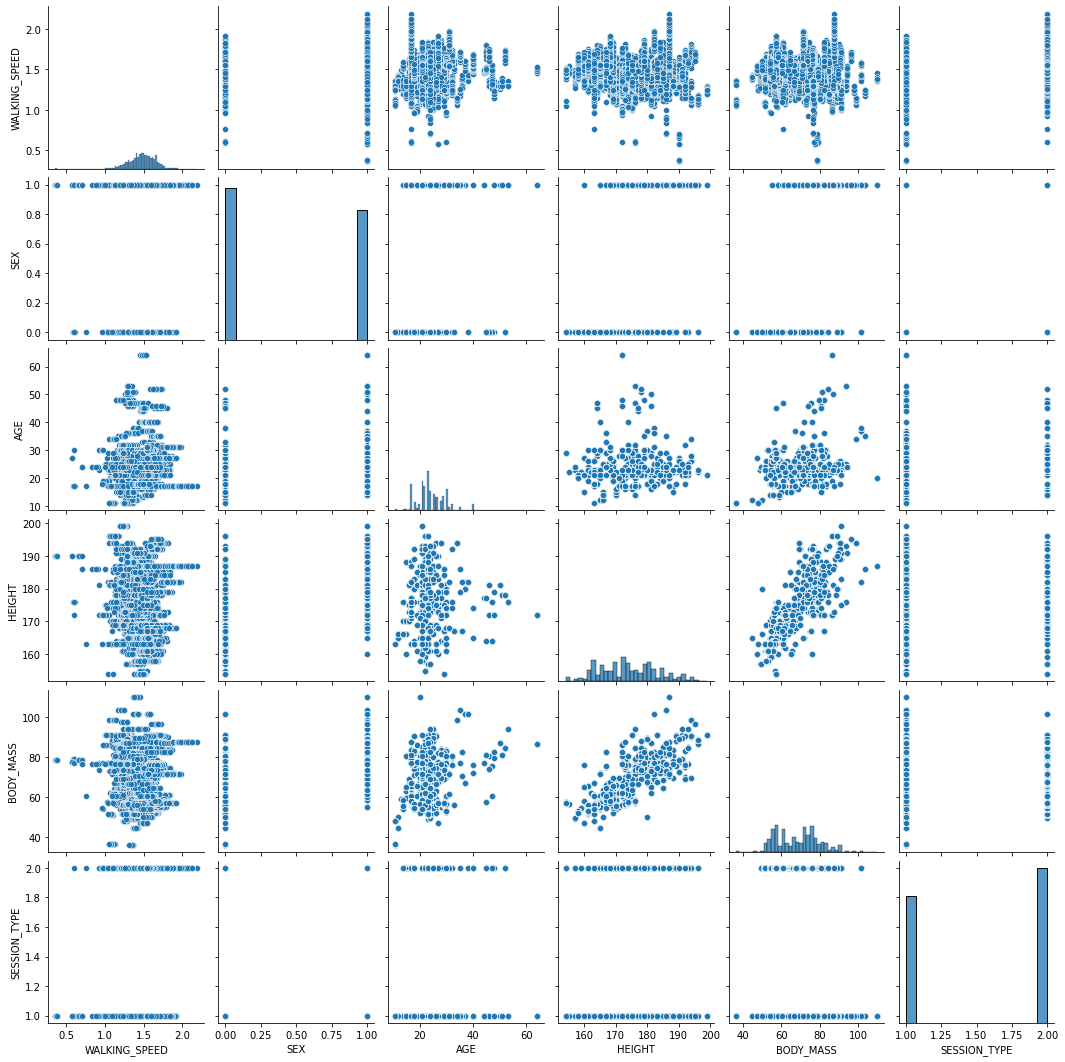

In [42]:
plt.figure(figsize=(15,10))
sns.pairplot(df.drop("grf", axis=1))

<Figure size 360x216 with 0 Axes>

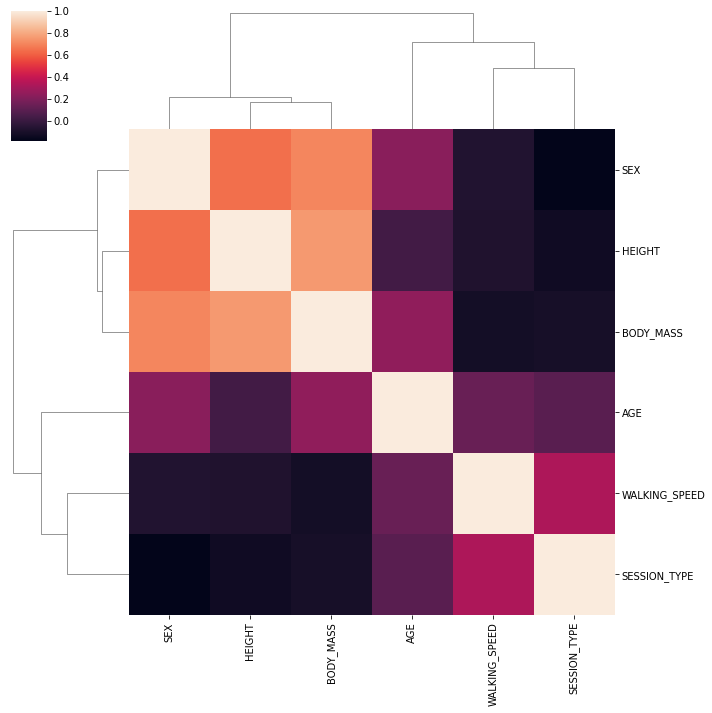

In [45]:
sns.clustermap(df.drop("grf", axis=1).corr())

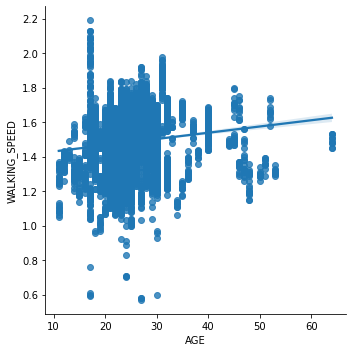

In [46]:
sns.lmplot(x='AGE', y="WALKING_SPEED", data=df)

C:\Users\Nathan\AppData\Local\Temp/ipykernel_9764/2830052982.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lmplot(x='grf', y="WALKING_SPEED", data=df[df["SEX"] == 0.0][df["AGE"] > 20][df["SESSION_TYPE"] == 1])
C:\Users\Nathan\AppData\Local\Temp/ipykernel_9764/2830052982.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lmplot(x='grf', y="WALKING_SPEED", data=df[df["SEX"] == 0.0][df["AGE"] > 20][df["SESSION_TYPE"] == 2])
C:\Users\Nathan\AppData\Local\Temp/ipykernel_9764/2830052982.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lmplot(x='grf', y="WALKING_SPEED", data=df[df["SEX"] == 1.0][df["AGE"] > 20][df["SESSION_TYPE"] == 1])
C:\Users\Nathan\AppData\Local\Temp/ipykernel_9764/2830052982.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lmplot(x='grf', y="WALKING_SPEED", data=df[df["SEX"] == 1.0][df["AGE"] > 20][df["SESSION_TYPE"]

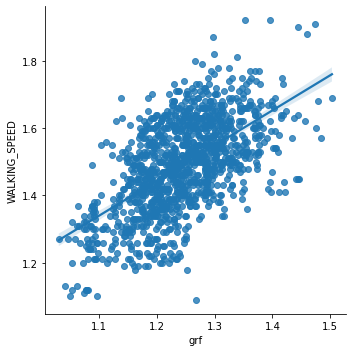

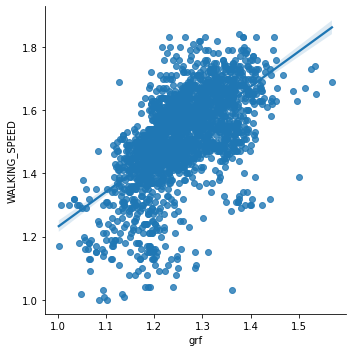

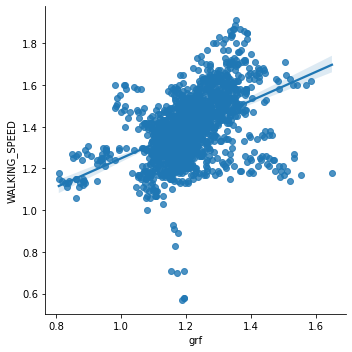

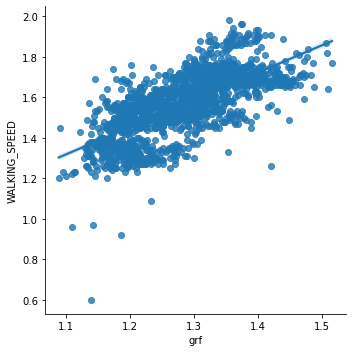

In [149]:
sns.lmplot(x='grf', y="WALKING_SPEED", data=df[df["SEX"] == 0.0][df["AGE"] > 20][df["SESSION_TYPE"] == 1])
sns.lmplot(x='grf', y="WALKING_SPEED", data=df[df["SEX"] == 0.0][df["AGE"] > 20][df["SESSION_TYPE"] == 2])
sns.lmplot(x='grf', y="WALKING_SPEED", data=df[df["SEX"] == 1.0][df["AGE"] > 20][df["SESSION_TYPE"] == 1])
sns.lmplot(x='grf', y="WALKING_SPEED", data=df[df["SEX"] == 1.0][df["AGE"] > 20][df["SESSION_TYPE"] == 2])

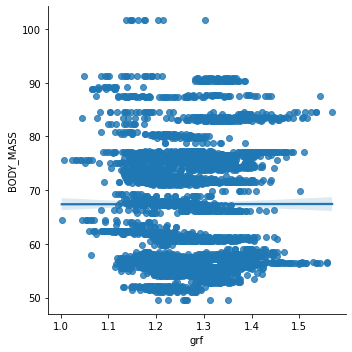

In [153]:
sns.lmplot(x='grf', y="BODY_MASS", data=df[df["SESSION_TYPE"] == 2])

Prétraitement

In [84]:
from sklearn.model_selection import train_test_split

In [125]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [86]:
def preprocessing(df):
    
    # df = encodage(df)
    # df = feature_engineering(df)
    # df = imputation(df)
    
    X = df.drop('grf', axis=1)
    y = df["grf"]
        
    return X, y

In [126]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

Modélisation

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [127]:
model = LinearRegression()

In [90]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()


In [129]:
evaluation(model)


1136    1.269700
3710    1.170151
2530    1.384727
6600    1.285501
4871    1.210036
          ...   
4931    1.261751
3264    1.270632
1653    1.182692
2607    1.170861
2732    1.187802
Name: grf, Length: 6436, dtype: float64